In [27]:
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [13]:
aaa = np.load('/root/real2sim/sim2sim/output/Table-v1/2023-04-02 11:30:39.526783/parameters.npy')

In [11]:
aaa_list = []
for a in aaa:
    aaa_list.append(a[0])

In [ ]:
aaa

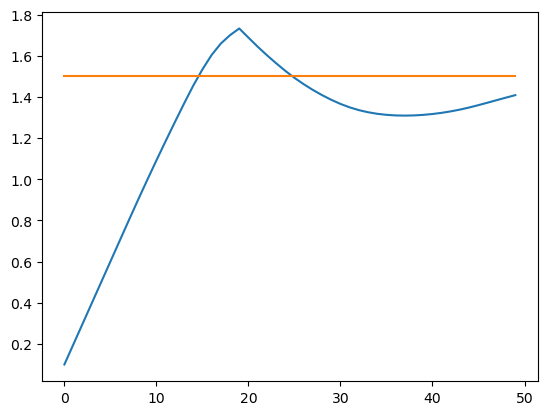

In [12]:
plt.plot(aaa_list)
plt.plot([1.5]*len(aaa_list))

In [2]:
obj_pcds = np.load('/root/real2sim/real2sim/points/test/object_pcd.npy')

In [43]:
obj_pcds.mean(axis=0)

array([0.50006532, 0.04963709, 0.49973741])

In [51]:
surface_index = []
threshold = 0.001
width = (0.3/2, 0.07/2, 0.1/2)
init_pos = (0.5, 0.05, 0.5)
for pcd in obj_pcds:
    if (init_pos[0] - width[0] + threshold >= pcd[0]) | (init_pos[0] + width[0] - threshold <= pcd[0]):
        surface_index.append(1)
    # don't use bottom side
    elif (init_pos[1] + width[1] - threshold <= pcd[1]):
        surface_index.append(1)
    elif (init_pos[2] - width[2] + threshold >= pcd[2]) | (init_pos[2] + width[2] - threshold <= pcd[2]):
        surface_index.append(1)
    else:
        surface_index.append(0)

In [52]:
init_pos[1] + width[1] - threshold

0.084

In [53]:
extracted_pcds = obj_pcds[np.array(surface_index).astype(bool), :]
extracted_pcds.shape[0]

427

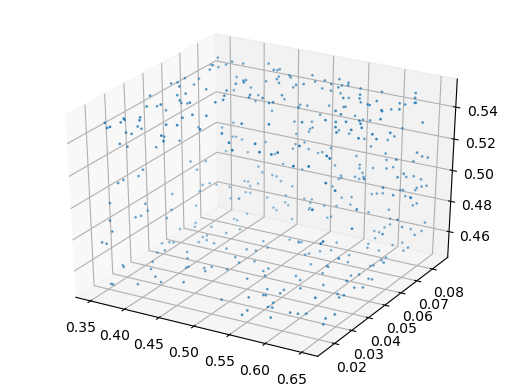

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(extracted_pcds[:, 0], extracted_pcds[:, 1], extracted_pcds[:, 2], s=1)

In [20]:
extracted_pcds[:, 0]

array([0.48127616, 0.52041337, 0.58344703, ..., 0.35449539, 0.4538832 ,
       0.55682995])

In [15]:
obj_pcds[[True], :]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10000 but corresponding boolean dimension is 1